In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as pltS
import numpy as np
from sklearn.preprocessing import RobustScaler


In [2]:
df = pd.read_excel("../data/Supermarket_Sales_generated.xlsx")

### Khám phá dữ liệu

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7183 entries, 0 to 7182
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      7183 non-null   object        
 1   Thời gian               7183 non-null   datetime64[ns]
 2   Thành phố               7183 non-null   object        
 3   Chi nhánh               7183 non-null   object        
 4   Nhóm khách hàng         6300 non-null   object        
 5   Giới tính               7084 non-null   object        
 6   Phân loại               7183 non-null   object        
 7   Tên SP                  7183 non-null   object        
 8   SKU                     7183 non-null   int64         
 9   Giá vốn đơn vị          7183 non-null   float64       
 10  Giá bán                 7183 non-null   float64       
 11  Số lượng                7183 non-null   int64         
 12  COGS                    7183 non-null   float64 

In [4]:
df.head()

,ID,Thời gian,Thành phố,Chi nhánh,Nhóm khách hàng,Giới tính,Phân loại,Tên SP,SKU,Giá vốn đơn vị,Giá bán,Số lượng,COGS,Discount,Phương thức thanh toán,Doanh thu ròng,Lợi nhuận
0,CUS-0001,2024-01-01 08:21:00,Hà Nội,ABC Thanh Xuân,Member,Female,Electronics,Tablet,1002,17955.07,23341.59,6,107730.42,3053.08,E-Wallet,136996.46,29266.04
1,CUS-0002,2024-01-01 09:16:00,TP.HCM,ABC Quận 1,Normal,Male,Electronics,Tablet,1002,17955.07,23341.59,7,125685.49,0.00,Cash,163391.13,37705.64
2,CUS-0003,2024-01-01 10:38:00,TP.HCM,ABC Quận 1,Normal,Male,Electronics,Bluetooth Speaker,1005,2094.52,2722.88,7,14661.64,306.87,Cash,18753.29,4091.65
3,CUS-0004,2024-01-01 17:11:00,Hà Nội,ABC Hoàn Kiếm,Normal,Female,Groceries,Soft Drink (500ml),1030,40.73,52.95,7,285.11,0.00,Credit Card,370.65,85.54
4,CUS-0005,2024-01-01 18:38:00,TP.HCM,ABC Thủ Đức,Member,Female,Groceries,Wheat Flour,1025,54.69,71.59,11,601.59,25.59,Credit Card,761.90,160.31


In [5]:
df.describe()

,Thời gian,SKU,Giá vốn đơn vị,Giá bán,Số lượng,COGS,Discount,Doanh thu ròng,Lợi nhuận
count,7183,7183.000000,7.183000e+03,7.183000e+03,7183.000000,7.183000e+03,7047.000000,7.183000e+03,7.183000e+03
mean,2024-11-27 11:03:15.595155200,1023.720451,1.036142e+04,1.347009e+04,7.413755,6.164282e+04,1291.315564,7.545140e+04,1.380859e+04
min,2024-01-01 08:21:00,1000.000000,7.080000e-03,9.100000e-03,1.000000,1.416000e-02,0.000000,1.817000e-02,-5.873140e+04
25%,2024-06-09 17:30:30,1010.000000,5.186000e+01,6.742000e+01,3.000000,2.297600e+02,2.050000,2.866050e+02,5.056500e+01
50%,2024-11-25 13:53:00,1023.000000,1.432700e+02,1.862500e+02,6.000000,8.115600e+02,26.770000,9.847700e+02,1.723200e+02
75%,2025-05-16 18:48:30,1032.000000,1.252710e+03,1.628520e+03,9.000000,6.189400e+03,209.405000,7.520320e+03,1.371480e+03
max,2025-11-01 19:36:00,1058.000000,1.225849e+07,1.593604e+07,143.000000,1.348434e+08,207519.450000,1.583277e+08,2.348435e+07
std,NaN,15.438123,2.616668e+05,3.401670e+05,11.922136,1.849713e+06,6798.382590,2.221685e+06,3.816074e+05


In [6]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Biến định tính:", cat_cols)
print("Biến định lượng:", num_cols)

Biến định tính: ['ID', 'Thành phố', 'Chi nhánh', 'Nhóm khách hàng', 'Giới tính', 'Phân loại', 'Tên SP', 'Phương thức thanh toán']
Biến định lượng: ['SKU', 'Giá vốn đơn vị', 'Giá bán', 'Số lượng', 'COGS', 'Discount', 'Doanh thu ròng', 'Lợi nhuận']


In [7]:
# Xem danh sách cột dạng object (chuỗi)
df.select_dtypes(include='object').columns

# Kiểm tra số lượng giá trị duy nhất trong từng cột
for col in df.select_dtypes(include='object').columns:
    print(col, df[col].nunique(), 'giá trị')

# Ví dụ: kiểm tra lỗi trong cột 'Loại hàng'
df['Tên SP'].value_counts()


ID 2833 giá trị
Thành phố 3 giá trị
Chi nhánh 9 giá trị
Nhóm khách hàng 2 giá trị
Giới tính 2 giá trị
Phân loại 6 giá trị
Tên SP 59 giá trị
Phương thức thanh toán 6 giá trị


Tên SP
Packaged Water (1L)    213
Energy Drink           213
Soft Drink (500ml)     211
Salt                   207
Cooking Oil            205
Tea                    204
Milk                   203
Rice                   200
Sugar                  199
Fruits                 197
Eggs                   196
Wheat Flour            195
Juice (1L)             192
Tablet                 184
Power Bank             182
Monitor                180
Bread                  176
Coffee (200g)          172
Bluetooth Speaker      172
Charger                167
Laptop                 166
USB Cable              163
Smartwatch             160
Headphones             158
Smartphone             154
Shirt                  139
Jacket                 120
Pants                  119
Skirt                  119
Jeans                  118
Cap                    116
Shoes                  116
Bralette               108
T-shirt                100
Socks                   99
Razor                   89
Sanitary Pads        

#### Xem outliers

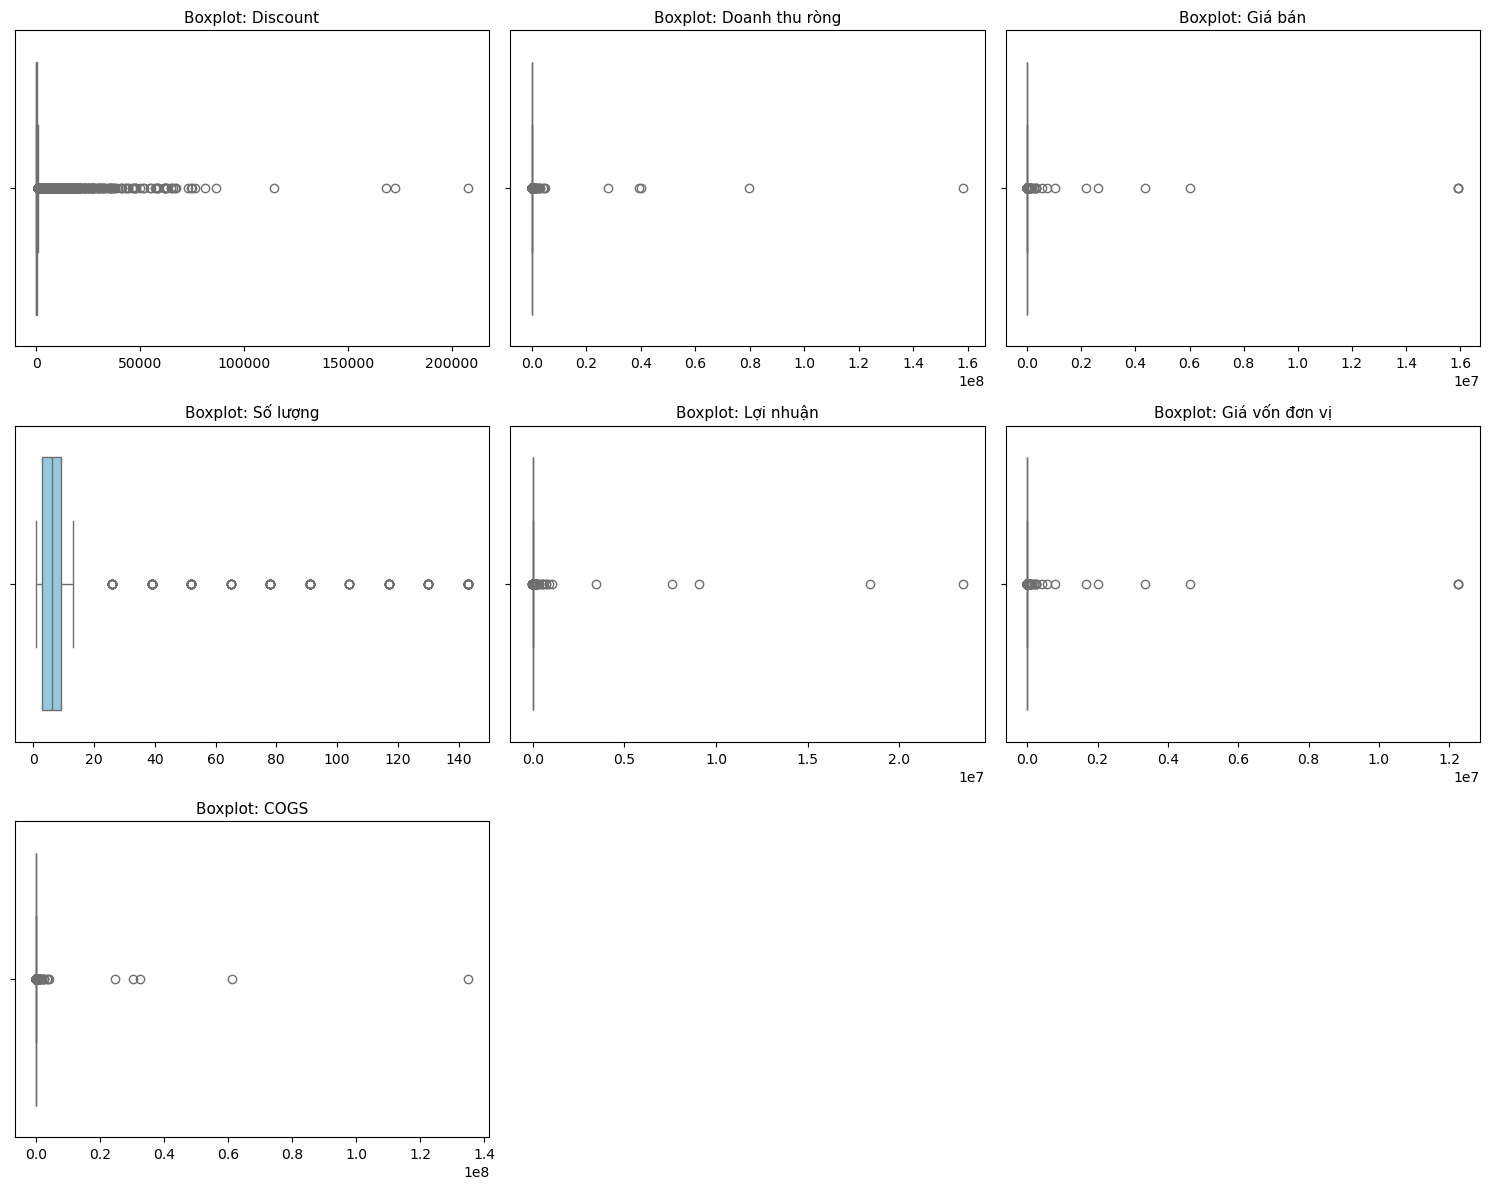

In [8]:
num_cols = ['Discount', 'Doanh thu ròng', 'Giá bán', 'Số lượng',
            'Lợi nhuận', 'Giá vốn đơn vị', 'COGS']

# Số cột hiển thị mỗi hàng (bạn có thể đổi tuỳ ý)
cols_per_row = 3
rows = (len(num_cols) + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(cols_per_row * 5, rows * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot: {col}', fontsize=11)
    plt.xlabel('')
    plt.tight_layout()

plt.show()

#### Độ tương quan

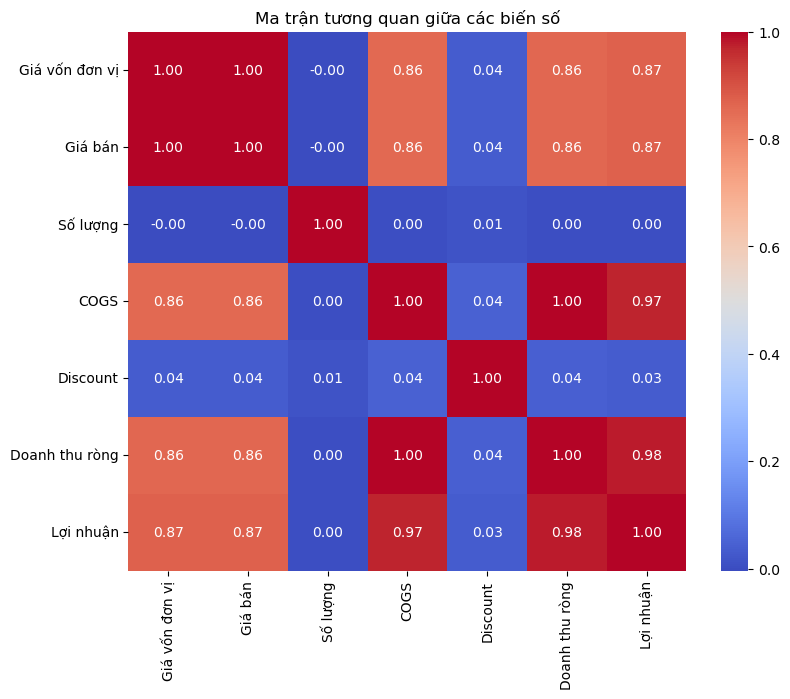

In [9]:

cols = ['Giá vốn đơn vị', 'Giá bán', 'Số lượng', 'COGS', 'Discount', 'Doanh thu ròng', 'Lợi nhuận']
corr = df[cols].corr()

plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Ma trận tương quan giữa các biến số")
plt.show()


### Xử lí dữ liệu

#### Missing value

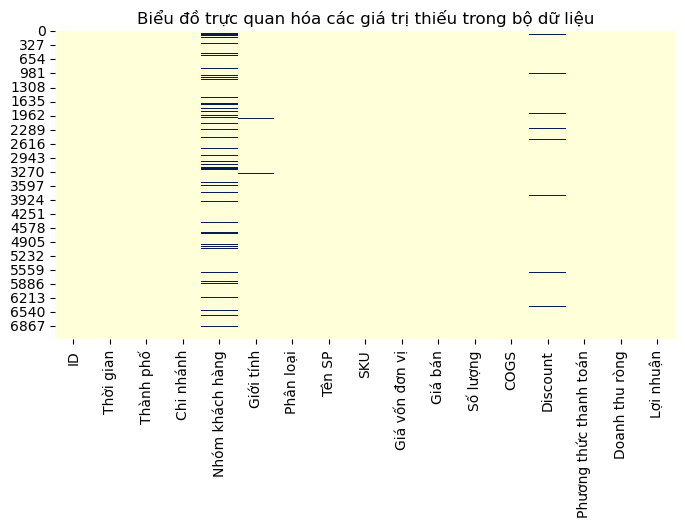

In [10]:
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu")
plt.title("Biểu đồ trực quan hóa các giá trị thiếu trong bộ dữ liệu")
plt.show()

In [11]:
missing = df.isnull().sum().sort_values(ascending=False)
unique_vals = df.nunique().sort_values(ascending=False)

print("Số lượng giá trị thiếu:\n", missing)
print("\nSố lượng giá trị unique:\n", unique_vals)

Số lượng giá trị thiếu:
 Nhóm khách hàng           883
Discount                  136
Giới tính                  99
Phương thức thanh toán     24
ID                          0
Chi nhánh                   0
Phân loại                   0
Thành phố                   0
Thời gian                   0
SKU                         0
Tên SP                      0
Giá vốn đơn vị              0
Giá bán                     0
COGS                        0
Số lượng                    0
Doanh thu ròng              0
Lợi nhuận                   0
dtype: int64

Số lượng giá trị unique:
 Thời gian                 6911
Doanh thu ròng            6071
Lợi nhuận                 5856
Discount                  4594
ID                        2833
COGS                       700
Giá vốn đơn vị             107
Giá bán                    107
SKU                         59
Tên SP                      59
Số lượng                    22
Chi nhánh                    9
Phân loại                    6
Phương thức thanh toán

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26572\1842082958.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_vals.index, y=unique_vals.values, palette="crest")


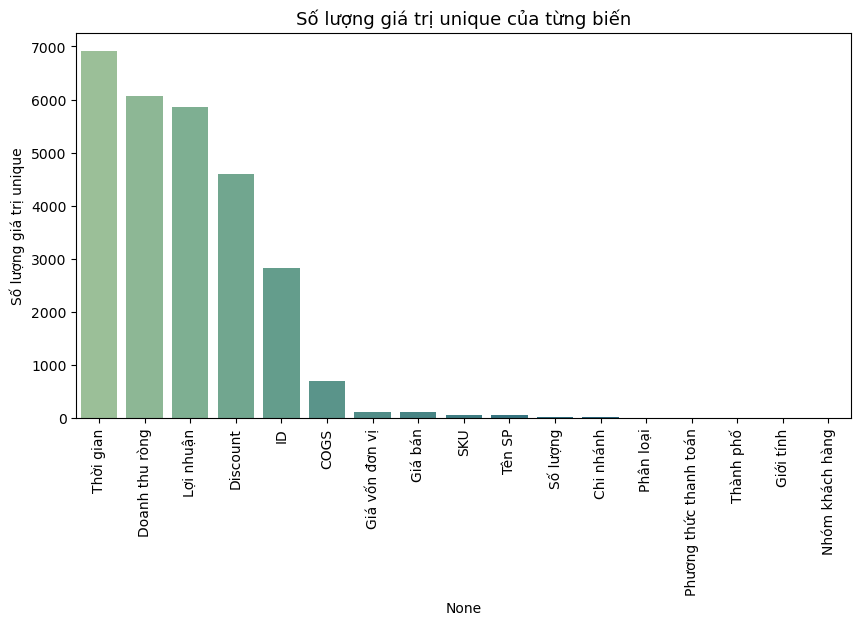

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(x=unique_vals.index, y=unique_vals.values, palette="crest")
plt.title("Số lượng giá trị unique của từng biến", fontsize=13)
plt.xticks(rotation=90)
plt.ylabel("Số lượng giá trị unique")
plt.show()

In [13]:
df["Nhóm khách hàng"] = df["Nhóm khách hàng"].fillna(df["Nhóm khách hàng"].mode()[0])
df["Giới tính"] = df["Giới tính"].fillna(df["Giới tính"].mode()[0])
df.dropna(subset=["Phương thức thanh toán"], inplace=True)
df["Discount"] = df["Discount"].fillna(0)

In [14]:
missing_before = df.isnull().sum()

missing_after = df.isnull().sum()

missing_report = pd.DataFrame({'Trước xử lý': missing_before, 'Sau xử lý': missing_after})
print(missing_report)

                        Trước xử lý  Sau xử lý
ID                                0          0
Thời gian                         0          0
Thành phố                         0          0
Chi nhánh                         0          0
Nhóm khách hàng                   0          0
Giới tính                         0          0
Phân loại                         0          0
Tên SP                            0          0
SKU                               0          0
Giá vốn đơn vị                    0          0
Giá bán                           0          0
Số lượng                          0          0
COGS                              0          0
Discount                          0          0
Phương thức thanh toán            0          0
Doanh thu ròng                    0          0
Lợi nhuận                         0          0


#### Duplicated

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

np.int64(0)

#### Inconsistent data

In [18]:
df['Phương thức thanh toán'].value_counts()

Phương thức thanh toán
E-Wallet       2409
Cash           2405
Credit Card    2333
Cashh             5
Creditt           4
QR                3
Name: count, dtype: int64

In [19]:
df["Phương thức thanh toán"] = df["Phương thức thanh toán"].replace({
    "Cashh": "Cash",
    "Creditt": "Credit Card",
    "QR": "E-Wallet" 
})


In [20]:
df['Phương thức thanh toán'].value_counts()

Phương thức thanh toán
E-Wallet       2412
Cash           2410
Credit Card    2337
Name: count, dtype: int64

In [21]:
cols = ['Giá vốn đơn vị', 'Giá bán', 'COGS', 'Doanh thu ròng', 'Lợi nhuận']
for c in cols:
    print(f"\n>>> Cột: {c}")
    print(df[c].describe())
    print(f"Ngưỡng 99%: {df[c].quantile(0.99):.2f}")



>>> Cột: Giá vốn đơn vị
count    7.159000e+03
mean     1.037291e+04
std      2.621039e+05
min      7.080000e-03
25%      5.186000e+01
50%      1.432700e+02
75%      1.252710e+03
max      1.225849e+07
Name: Giá vốn đơn vị, dtype: float64
Ngưỡng 99%: 54130.33

>>> Cột: Giá bán
count    7.159000e+03
mean     1.348502e+04
std      3.407352e+05
min      9.100000e-03
25%      6.742000e+01
50%      1.862500e+02
75%      1.628520e+03
max      1.593604e+07
Name: Giá bán, dtype: float64
Ngưỡng 99%: 70369.43

>>> Cột: COGS
count    7.159000e+03
mean     6.174494e+04
std      1.852808e+06
min      1.416000e-02
25%      2.297600e+02
50%      8.115600e+02
75%      6.127505e+03
max      1.348434e+08
Name: COGS, dtype: float64
Ngưỡng 99%: 378912.31

>>> Cột: Doanh thu ròng
count    7.159000e+03
mean     7.557400e+04
std      2.225401e+06
min      1.817000e-02
25%      2.867850e+02
50%      9.844200e+02
75%      7.502070e+03
max      1.583277e+08
Name: Doanh thu ròng, dtype: float64
Ngưỡng 99%: 478912

In [22]:
cols = ['Giá vốn đơn vị', 'Giá bán', 'COGS', 'Doanh thu ròng', 'Lợi nhuận']

for c in cols:
    q99 = df[c].quantile(0.99)   
    mask = df[c] > q99 * 10     
    print(f"\nCột {c}: {mask.sum()} giá trị nghi ngờ.")
    if mask.sum() > 0:
        df.loc[mask, c] = df.loc[mask, c] / 1000
        print(f" → Đã hiệu chỉnh {mask.sum()} giá trị (chia 1000).")



Cột Giá vốn đơn vị: 9 giá trị nghi ngờ.
 → Đã hiệu chỉnh 9 giá trị (chia 1000).

Cột Giá bán: 9 giá trị nghi ngờ.
 → Đã hiệu chỉnh 9 giá trị (chia 1000).

Cột COGS: 6 giá trị nghi ngờ.
 → Đã hiệu chỉnh 6 giá trị (chia 1000).

Cột Doanh thu ròng: 6 giá trị nghi ngờ.
 → Đã hiệu chỉnh 6 giá trị (chia 1000).

Cột Lợi nhuận: 6 giá trị nghi ngờ.
 → Đã hiệu chỉnh 6 giá trị (chia 1000).


In [23]:
for c in cols:
    print(f"\nSau xử lý {c}:")
    print(df[c].describe())



Sau xử lý Giá vốn đơn vị:
count      7159.000000
mean       3423.806702
std       12523.151137
min           0.007080
25%          51.860000
50%         143.270000
75%        1252.710000
max      434680.000000
Name: Giá vốn đơn vị, dtype: float64

Sau xử lý Giá bán:
count      7159.000000
mean       4451.187372
std       16280.749168
min           0.009100
25%          67.420000
50%         186.250000
75%        1628.520000
max      565080.000000
Name: Giá bán, dtype: float64

Sau xử lý COGS:
count    7.159000e+03
mean     2.165473e+04
std      1.043060e+05
min      1.416000e-02
25%      2.297600e+02
50%      8.115600e+02
75%      6.065610e+03
max      3.477440e+06
Name: COGS, dtype: float64

Sau xử lý Doanh thu ròng:
count    7.159000e+03
mean     2.671028e+04
std      1.299685e+05
min      1.817000e-02
25%      2.867850e+02
50%      9.844200e+02
75%      7.488340e+03
max      4.520640e+06
Name: Doanh thu ròng, dtype: float64

Sau xử lý Lợi nhuận:
count      7159.000000
mean       50

In [24]:
df.head()

,ID,Thời gian,Thành phố,Chi nhánh,Nhóm khách hàng,Giới tính,Phân loại,Tên SP,SKU,Giá vốn đơn vị,Giá bán,Số lượng,COGS,Discount,Phương thức thanh toán,Doanh thu ròng,Lợi nhuận
0,CUS-0001,2024-01-01 08:21:00,Hà Nội,ABC Thanh Xuân,Member,Female,Electronics,Tablet,1002,17955.07,23341.59,6,107730.42,3053.08,E-Wallet,136996.46,29266.04
1,CUS-0002,2024-01-01 09:16:00,TP.HCM,ABC Quận 1,Normal,Male,Electronics,Tablet,1002,17955.07,23341.59,7,125685.49,0.00,Cash,163391.13,37705.64
2,CUS-0003,2024-01-01 10:38:00,TP.HCM,ABC Quận 1,Normal,Male,Electronics,Bluetooth Speaker,1005,2094.52,2722.88,7,14661.64,306.87,Cash,18753.29,4091.65
3,CUS-0004,2024-01-01 17:11:00,Hà Nội,ABC Hoàn Kiếm,Normal,Female,Groceries,Soft Drink (500ml),1030,40.73,52.95,7,285.11,0.00,Credit Card,370.65,85.54
4,CUS-0005,2024-01-01 18:38:00,TP.HCM,ABC Thủ Đức,Member,Female,Groceries,Wheat Flour,1025,54.69,71.59,11,601.59,25.59,Credit Card,761.90,160.31


### Lọc outlier

In [25]:
def clean_outliers(df, 
                       group_col="SKU",
                       iqr_cols=None,
                       num_cols=None,
                       lower_p=0.01,
                       upper_p=0.99,
                       check_logic=True,
                       scale_data=False):
    df_clean = df.copy()
    # =====Lọc theo nhóm (IQR) =====
    if iqr_cols:
        for col in iqr_cols:
            def _filter(x):
                q1 = x[col].quantile(0.25)
                q3 = x[col].quantile(0.75)
                iqr = q3 - q1
                lower = q1 - 1.5 * iqr
                upper = q3 + 1.5 * iqr
                return x[(x[col] >= lower) & (x[col] <= upper)]
            df_clean = df_clean.groupby(group_col, group_keys=False).apply(_filter)

    # ===== Lọc toàn cục theo percentile =====
    if num_cols:
        for col in num_cols:
            q1 = df_clean[col].quantile(lower_p)
            q99 = df_clean[col].quantile(upper_p)
            df_clean = df_clean[(df_clean[col] >= q1) & (df_clean[col] <= q99)]

    # =====  Kiểm tra logic nghiệp vụ =====
    if check_logic:
        logic_before = len(df_clean)
        df_clean = df_clean[
            (df_clean["Giá bán"] >= df_clean["Giá vốn đơn vị"]) &
            (df_clean["Lợi nhuận"] >= 0) &
            (df_clean["Số lượng"] > 0) &
            (df_clean["Doanh thu ròng"] > 0)
        ]
        print(f"Đã loại {logic_before - len(df_clean)} dòng không hợp lý (logic check)")

    # =====  Chuẩn hoá dữ liệu (tuỳ chọn) =====
    if scale_data:
        scaler = RobustScaler()
        cols_to_scale = [col for col in num_cols if col in df_clean.columns]
        df_clean[cols_to_scale] = scaler.fit_transform(df_clean[cols_to_scale])
        print(" Dữ liệu đã được chuẩn hoá bằng RobustScaler")

    print(f"Ban đầu: {len(df)} dòng")
    print(f"Sau khi lọc xong: {len(df_clean)} dòng")
    print(f"Giữ lại: {round(len(df_clean)/len(df)*100, 2)}% dữ liệu hợp lệ")

    return df_clean


In [26]:
iqr_columns = ["Giá bán", "Doanh thu ròng", "Lợi nhuận"]
percentile_columns = ["Discount", "Giá bán", "Số lượng", "Doanh thu ròng", "Lợi nhuận"]

df_final = clean_outliers(
    df,
    group_col="SKU",
    iqr_cols=iqr_columns,
    num_cols=percentile_columns,
    lower_p=0.01,
    upper_p=0.99,
    check_logic=True,   # Bật kiểm tra logic
    scale_data=False    # Bỏ chuẩn hoá nếu chỉ muốn làm sạch
)


Đã loại 62 dòng không hợp lý (logic check)
Ban đầu: 7159 dòng
Sau khi lọc xong: 6567 dòng
Giữ lại: 91.73% dữ liệu hợp lệ


C:\Users\ASUS\AppData\Local\Temp\ipykernel_26572\1025523394.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_clean = df_clean.groupby(group_col, group_keys=False).apply(_filter)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26572\1025523394.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_clean = df_clean.groupby(group_col, group_keys=False).apply(_filter)
C:\Users\ASUS\AppData\Local\Temp\ipykern

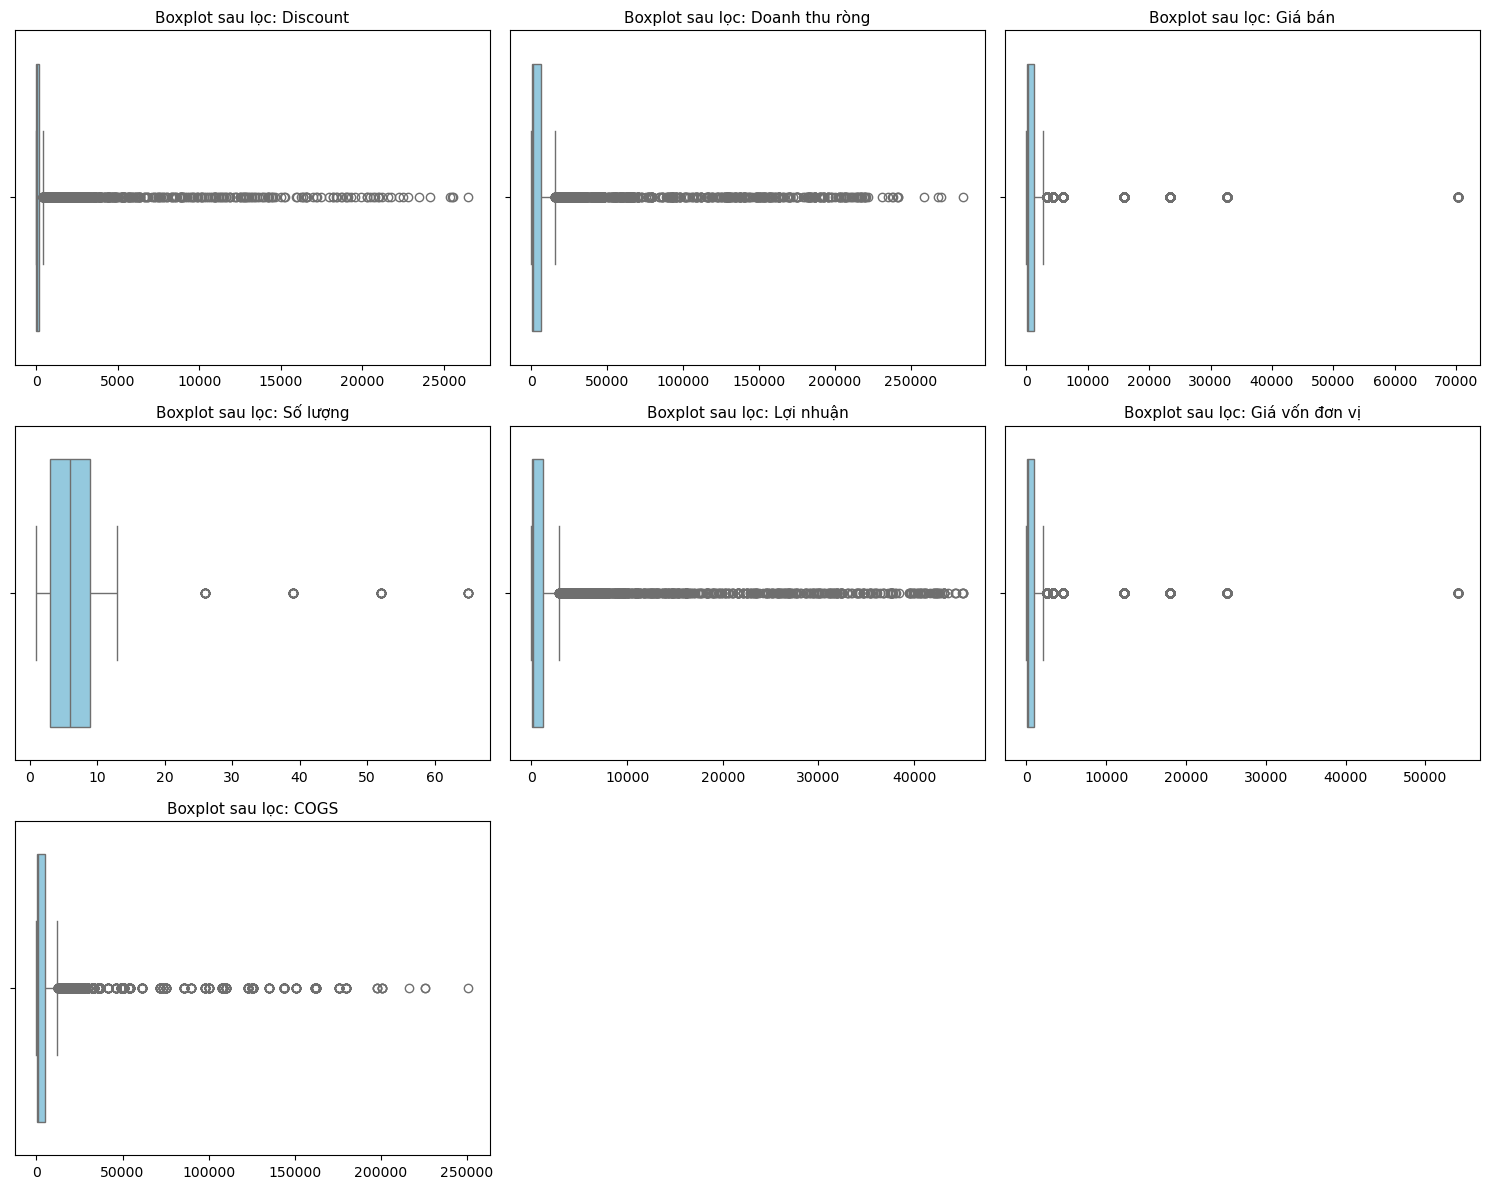

In [27]:
num_cols = ['Discount', 'Doanh thu ròng', 'Giá bán', 'Số lượng',
            'Lợi nhuận', 'Giá vốn đơn vị', 'COGS']

# Số cột hiển thị mỗi hàng (bạn có thể đổi tuỳ ý)
cols_per_row = 3
rows = (len(num_cols) + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(cols_per_row * 5, rows * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.boxplot(x=df_final[col], color='skyblue')
    plt.title(f'Boxplot sau lọc: {col}', fontsize=11)
    plt.xlabel('')
    plt.tight_layout()
plt.show()

In [28]:
def compare_stats(before, after, cols):
    summary = pd.DataFrame(index=cols, columns=["Mean (Before)", "Mean (After)", 
                                                "Std (Before)", "Std (After)", 
                                                "Median (Before)", "Median (After)"])
    for col in cols:
        summary.loc[col] = [
            before[col].mean(), after[col].mean(),
            before[col].std(), after[col].std(),
            before[col].median(), after[col].median()
        ]
    return summary

num_cols = ["Giá bán", "Số lượng", "Doanh thu ròng", "Lợi nhuận"]
compare_stats(df, df_final, num_cols)


,Mean (Before),Mean (After),Std (Before),Std (After),Median (Before),Median (After)
Giá bán,4451.187372,2568.479147,16280.749168,7681.000547,186.25,186.25
Số lượng,7.405085,6.32572,11.91161,4.733087,6.0,6.0
Doanh thu ròng,26710.280087,12216.82549,129968.453026,33582.773726,984.42,952.77
Lợi nhuận,5034.07473,2348.3088,25515.803624,6454.116165,172.32,175.53


In [29]:
df_final.head(5)

,ID,Thời gian,Thành phố,Chi nhánh,Nhóm khách hàng,Giới tính,Phân loại,Tên SP,SKU,Giá vốn đơn vị,Giá bán,Số lượng,COGS,Discount,Phương thức thanh toán,Doanh thu ròng,Lợi nhuận
6,CUS-0007,2024-01-01 20:34:00,Đà Nẵng,ABC Hải Châu,Member,Male,Electronics,Laptop,1000,54130.33,70369.43,1,54130.33,0.00,E-Wallet,70369.43,16239.10
195,CUS-0042,2024-01-18 20:04:00,TP.HCM,ABC Thủ Đức,Normal,Female,Electronics,Laptop,1000,54130.33,70369.43,3,162390.99,8592.11,Cash,202516.18,40125.19
233,CUS-0120,2024-01-20 20:05:00,Hà Nội,ABC Cầu Giấy,Normal,Male,Electronics,Laptop,1000,54130.33,70369.43,2,108260.66,3082.18,E-Wallet,137656.68,29396.02
723,CUS-0080,2024-03-09 17:04:00,Đà Nẵng,ABC Hải Châu,Member,Male,Electronics,Laptop,1000,54130.33,70369.43,3,162390.99,18176.42,E-Wallet,192931.87,30540.88
946,CUS-0005,2024-03-30 18:03:00,TP.HCM,ABC Quận 7,Member,Female,Electronics,Laptop,1000,54130.33,70369.43,2,108260.66,3419.95,Credit Card,137318.91,29058.25


In [30]:
iqr_columns = ["Giá bán", "Doanh thu ròng", "Lợi nhuận"]
percentile_columns = ["Discount", "Giá bán", "Số lượng", "Doanh thu ròng", "Lợi nhuận"]

df_normalized = clean_outliers(
    df,
    group_col="SKU",
    iqr_cols=iqr_columns,
    num_cols=percentile_columns,
    lower_p=0.01,
    upper_p=0.99,
    check_logic=True,   # Bật kiểm tra logic
    scale_data=True    # Bỏ chuẩn hoá nếu chỉ muốn làm sạch
)


Đã loại 62 dòng không hợp lý (logic check)
 Dữ liệu đã được chuẩn hoá bằng RobustScaler
Ban đầu: 7159 dòng
Sau khi lọc xong: 6567 dòng
Giữ lại: 91.73% dữ liệu hợp lệ


C:\Users\ASUS\AppData\Local\Temp\ipykernel_26572\1025523394.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_clean = df_clean.groupby(group_col, group_keys=False).apply(_filter)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26572\1025523394.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_clean = df_clean.groupby(group_col, group_keys=False).apply(_filter)
C:\Users\ASUS\AppData\Local\Temp\ipykern

In [ ]:
df_normalized.to_excel("Supermarket_Transaction_normalized.xlsx", index=False)